<a href="https://colab.research.google.com/github/john-d-noble/callcenter/blob/main/CX_Basic_Model_Exploration_Run_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# =============================================================================
# TIME SERIES FORECASTING NOTEBOOK - BASIC MODELS
# =============================================================================



#This notebook uses basic default parameters without any hyperparameter optimization. Looking at the models:
#Current Basic Approach:

#Random Forest: Fixed parameters (n_estimators=50, max_depth=8)
#Gradient Boosting: Fixed parameters (n_estimators=50, max_depth=4)
#Linear models: Default sklearn parameters
#Traditional models: Basic configurations

#Missing Optimization:

#No GridSearchCV
#No RandomizedSearchCV
#No Bayesian optimization
#No cross-validation parameter tuning

In [5]:
#GPU & HIGH Memory

!nvidia-smi




import torch

# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")

# Example: Move a tensor to the GPU
x = torch.randn(10, 10).to(device)

# Example: Move a model to the GPU
# model = YourModel().to(device)

Sun Sep 21 22:12:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P0             27W /   70W |     104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

📞 Call Center Forecasting Notebook - Data Leakage Free Version!
📁 Loading raw data from enhanced_eda_data.csv...
🔍 Found volume column: 'calls'
📈 Found market data columns in main file: 12 columns
   Market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume']...
📊 Using integrated market data from main file
   📈 Organized into 5 market datasets

📊 FINAL MARKET DATA STATUS:
   Datasets: 5
   Total columns: 9
   Available tickers: ['^VIX', 'SPY', 'QQQ', 'BTC-USD', 'ETH-USD']
🧹 Data Quality Assessment and Cleaning
----------------------------------------
⚠️  Trimming first and last rows (problematic data as noted)
   🗑️ Removing first row: 2023-01-02 (5055 calls)
   🗑️ Removing last row:  2025-09-03 (9748 calls)
   ✅ Cleaned dataset: 976 → 974 rows
📅 Final date range: 2023-01-03 to 2025-09-02
📊 Total days: 974
❓ Missing values: 0
🔒 CREATING STRICT CV SPLITS (Pre-Feature Engineering)
⚠️  This MUST happen before any feature engineering to prevent leakage
📊 Dataset s

DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/8icjcr0g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/wi6ca3h5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21850', 'data', 'file=/tmp/tmpptrtomju/8icjcr0g.json', 'init=/tmp/tmpptrtomju/wi6ca3h5.json', 'output', 'file=/tmp/tmpptrtomju/prophet_model51480fmy/prophet_model-20250921221207.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:12:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


   🟡 Fitting ML models...
      ⚠️ Insufficient ML data: train=960, test=0

📊 Evaluating Split 2/5
----------------------------------------
   📅 Train: 960 days
   📅 Test: 7 days
🛠️ Creating features (leakage-free)...
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   ✅ Training features: (960, 49)
   ✅ Test features: (7, 49)
   🔵 Fitting baseline models...
   🟠 Fitting adaptive models...
   🟢 Fitting traditional models...
   📏 Limited training to last 60 days


DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/qana0cdw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/k5g7uy61.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53416', 'data', 'file=/tmp/tmpptrtomju/qana0cdw.json', 'init=/tmp/tmpptrtomju/k5g7uy61.json', 'output', 'file=/tmp/tmpptrtomju/prophet_modeld8c1hgos/prophet_model-20250921221208.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:12:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:12:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


   🟡 Fitting ML models...
      ⚠️ Insufficient ML data: train=953, test=0

📊 Evaluating Split 3/5
----------------------------------------
   📅 Train: 953 days
   📅 Test: 7 days
🛠️ Creating features (leakage-free)...
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   ✅ Training features: (953, 49)
   ✅ Test features: (7, 49)
   🔵 Fitting baseline models...
   🟠 Fitting adaptive models...
   🟢 Fitting traditional models...
   📏 Limited training to last 60 days


DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/yzde875_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/0_cl6kyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6031', 'data', 'file=/tmp/tmpptrtomju/yzde875_.json', 'init=/tmp/tmpptrtomju/0_cl6kyf.json', 'output', 'file=/tmp/tmpptrtomju/prophet_modelzr9_ogsk/prophet_model-20250921221209.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:12:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:12:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


   🟡 Fitting ML models...
      ⚠️ Insufficient ML data: train=946, test=0

📊 Evaluating Split 4/5
----------------------------------------
   📅 Train: 946 days
   📅 Test: 7 days
🛠️ Creating features (leakage-free)...
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   ✅ Training features: (946, 49)
   ✅ Test features: (7, 49)
   🔵 Fitting baseline models...
   🟠 Fitting adaptive models...
   🟢 Fitting traditional models...
   📏 Limited training to last 60 days


DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/c9a5_4sn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/rrkgk2u2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80092', 'data', 'file=/tmp/tmpptrtomju/c9a5_4sn.json', 'init=/tmp/tmpptrtomju/rrkgk2u2.json', 'output', 'file=/tmp/tmpptrtomju/prophet_modelc3klmlsi/prophet_model-20250921221210.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:12:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:12:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


   🟡 Fitting ML models...
      ⚠️ Insufficient ML data: train=939, test=0

📊 Evaluating Split 5/5
----------------------------------------
   📅 Train: 939 days
   📅 Test: 7 days
🛠️ Creating features (leakage-free)...
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   ✅ Training features: (939, 49)
   ✅ Test features: (7, 49)
   🔵 Fitting baseline models...
   🟠 Fitting adaptive models...
   🟢 Fitting traditional models...
   📏 Limited training to last 60 days


DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/ulithq86.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/_7nyir9k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9310', 'data', 'file=/tmp/tmpptrtomju/ulithq86.json', 'init=/tmp/tmpptrtomju/_7nyir9k.json', 'output', 'file=/tmp/tmpptrtomju/prophet_modelpu8h02le/prophet_model-20250921221211.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:12:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:12:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


   🟡 Fitting ML models...
      ⚠️ Insufficient ML data: train=932, test=0
📊 CALL CENTER FORECASTING (LEAKAGE-FREE) PERFORMANCE REPORT
🏆 Champion Model: holt_winters_short
📅 Report Generated: 2025-09-21 22:12:11
📊 COMPLETE MODEL PERFORMANCE COMPARISON
Model                          MAE        RMSE       MAPE     MASE     R²      
-------------------------------------------------------------------------------
holt_winters_short             509.36     643.21     6.7      0.793    0.801   
sarima_short                   518.57     625.53     6.7      0.793    0.817   
baseline_seasonal_naive        637.86     837.96     7.8      1.000    0.719   
prophet_short                  927.41     1039.51    12.4     1.464    0.513   
adaptive_linear_trend          1390.61    1946.56    23.4     2.295    -0.323  
adaptive_weighted              1420.86    1760.35    22.2     2.388    -0.061  
baseline_mean                  1437.54    1810.20    22.6     2.422    -0.131  
adaptive_exp_smooth         

INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/acj65ztm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/hei8qja5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35779', 'data', 'file=/tmp/tmpptrtomju/acj65ztm.json', 'init=/tmp/tmpptrtomju/hei8qja5.json', 'output', 'file=/tmp/tmpptrtomju/prophet_model1xam1syw/prophet_model-20250921221211.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:12:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:12:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📊 Ensemble for Split 2
🛠️ Creating features (leakage-free)...
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   ✅ Training features: (30, 49)
   ✅ Test features: (7, 49)


INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/zu6riiab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/78pa4vzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8864', 'data', 'file=/tmp/tmpptrtomju/zu6riiab.json', 'init=/tmp/tmpptrtomju/78pa4vzo.json', 'output', 'file=/tmp/tmpptrtomju/prophet_modeleew9foo0/prophet_model-20250921221212.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:12:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:12:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📊 Ensemble for Split 3
🛠️ Creating features (leakage-free)...
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   ✅ Training features: (30, 49)
   ✅ Test features: (7, 49)


INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/etxjmhz0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/gnfhn_pw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33948', 'data', 'file=/tmp/tmpptrtomju/etxjmhz0.json', 'init=/tmp/tmpptrtomju/gnfhn_pw.json', 'output', 'file=/tmp/tmpptrtomju/prophet_modelhfagorsm/prophet_model-20250921221212.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:12:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:12:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📊 Ensemble for Split 4
🛠️ Creating features (leakage-free)...
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   ✅ Training features: (30, 49)
   ✅ Test features: (7, 49)


INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/ygtnllq2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/6m6oe3oh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75325', 'data', 'file=/tmp/tmpptrtomju/ygtnllq2.json', 'init=/tmp/tmpptrtomju/6m6oe3oh.json', 'output', 'file=/tmp/tmpptrtomju/prophet_model7z8ii5jx/prophet_model-20250921221213.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:12:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:12:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📊 Ensemble for Split 5
🛠️ Creating features (leakage-free)...
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   📈 Integrating 5 market datasets...
   ✅ Added 9 market columns: ['^VIX_close', 'SPY_close', 'SPY_volume', 'QQQ_close', 'QQQ_volume', 'BTC-USD_close', 'BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume']
   ✅ Training features: (30, 49)
   ✅ Test features: (7, 49)


INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/83addqvr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptrtomju/b7gjs103.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69598', 'data', 'file=/tmp/tmpptrtomju/83addqvr.json', 'init=/tmp/tmpptrtomju/b7gjs103.json', 'output', 'file=/tmp/tmpptrtomju/prophet_modelchn5tk9g/prophet_model-20250921221213.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:12:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:12:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



FINAL RESULTS WITH ENSEMBLE MODELS
📊 CALL CENTER FORECASTING (LEAKAGE-FREE) + ENSEMBLES PERFORMANCE REPORT
🏆 Champion Model: holt_winters_short
📅 Report Generated: 2025-09-21 22:12:13
📊 COMPLETE MODEL PERFORMANCE COMPARISON
Model                          MAE        RMSE       MAPE     MASE     R²      
-------------------------------------------------------------------------------
holt_winters_short             509.36     643.21     6.7      0.793    0.801   
sarima_short                   518.57     625.53     6.7      0.793    0.817   
baseline_seasonal_naive        637.86     837.96     7.8      1.000    0.719   
prophet_short                  927.41     1039.51    12.4     1.464    0.513   
ensemble_mean                  989.17     1223.15    15.6     1.643    0.480   
ensemble_median                1135.02    1515.19    18.7     1.849    0.177   
adaptive_linear_trend          1390.61    1946.56    23.4     2.295    -0.323  
ensemble_adaptive_only         1375.80    1803.88    22

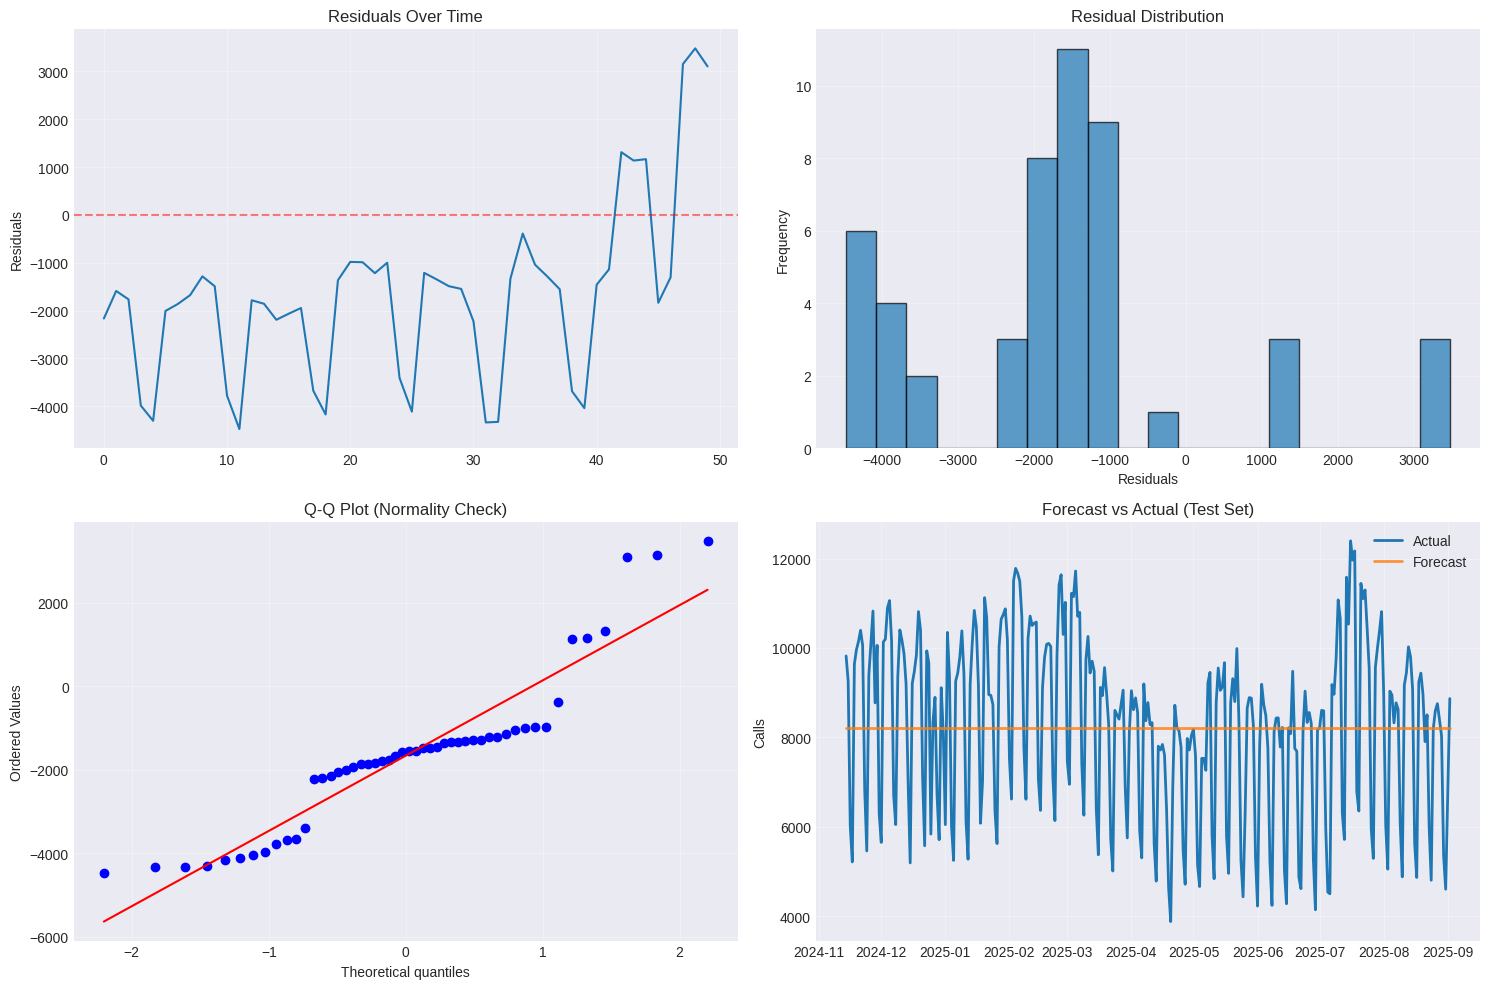


📊 RESIDUAL STATISTICS:
   Mean: -1666.513
   Std: 1850.556
   Skewness: 0.838
   Kurtosis: 1.047

🎯 TEST SET PERFORMANCE:
   MAPE: 23.27%
   MAE: 1664.6
   vs Seasonal Naive: -12.6%
   R²: -0.001

🎉 ANALYSIS COMPLETE!
📊 All models evaluated with strict leakage prevention
🔒 Feature engineering applied separately to each CV split
📈 Market data integration confirmed and utilized
📋 Standardized performance reporting generated


In [6]:
# =============================================================================
# TIME SERIES FORECASTING NOTEBOOK - DATA LEAKAGE FREE VERSION
# =============================================================================

# =============================================================================
# CELL 1: Import Libraries and Setup
# =============================================================================

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Core libraries
from datetime import datetime, timedelta
import json
import pickle
from typing import Dict, List, Tuple, Optional
import holidays

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')

# Statistical and time series
from scipy import stats
from scipy.stats import jarque_bera, shapiro
from scipy.signal import find_peaks
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Prophet (optional)
try:
    from prophet import Prophet
    PROPHET_AVAILABLE = True
except ImportError:
    print("Prophet not available - install with: pip install prophet")
    PROPHET_AVAILABLE = False

# ML models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

# Set style
plt.rcParams['figure.figsize'] = (12, 6)

print("📞 Call Center Forecasting Notebook - Data Leakage Free Version!")
print("=" * 60)

# =============================================================================
# CELL 2: Data Loading (Check for Market Data in Main File)
# =============================================================================

def load_raw_data_with_market_check(file_path='enhanced_eda_data.csv', volume_col=None):
    """
    Load raw call center data and check if market data is already included
    This ensures we start with clean, unmodified data and detect existing market columns
    """

    try:
        print(f"📁 Loading raw data from {file_path}...")

        # Load with Date as index
        df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

        # Auto-detect volume column if not specified
        if volume_col is None:
            possible_cols = ['calls', 'Calls', 'call_volume', 'Call_Volume', 'volume', 'Volume',
                           'call_count', 'Call_Count', 'total_calls', 'Total_Calls']

            volume_col = None
            for col in possible_cols:
                if col in df.columns:
                    volume_col = col
                    break

            if volume_col is None:
                numeric_cols = df.select_dtypes(include=[np.number]).columns
                if len(numeric_cols) > 0:
                    volume_col = numeric_cols[0]
                    print(f"🔍 Auto-detected volume column: '{volume_col}'")
                else:
                    raise ValueError("No numeric columns found for call volume")
            else:
                print(f"🔍 Found volume column: '{volume_col}'")

        # Check for market data columns in the same file
        market_indicators = ['^VIX', 'VIX', 'SPY', 'QQQ', 'BTC', 'ETH', 'DX-Y', 'GC=F']
        market_columns = []

        for col in df.columns:
            if any(indicator in col for indicator in market_indicators):
                market_columns.append(col)

        if market_columns:
            print(f"📈 Found market data columns in main file: {len(market_columns)} columns")
            print(f"   Market columns: {market_columns[:5]}{'...' if len(market_columns) > 5 else ''}")

            # Separate call data and market data
            calls_df = df[[volume_col]].rename(columns={volume_col: 'calls'}).sort_index()
            market_df = df[market_columns].sort_index()

            return calls_df, market_df, True  # True indicates market data found in main file
        else:
            print("📊 No market data columns found in main file")
            print("   Will attempt to load from separate market data files")

            # Just return calls data
            calls_df = df[[volume_col]].rename(columns={volume_col: 'calls'}).sort_index()

            return calls_df, None, False  # False indicates need to load separate files

    except FileNotFoundError:
        print(f"❌ File '{file_path}' not found!")
        return None, None, False
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None, None, False

# Load raw data and check for integrated market data
raw_df, integrated_market_data, market_data_integrated = load_raw_data_with_market_check('enhanced_eda_data.csv')

# =============================================================================
# CELL 3: Market Data Loading (Handle Both Integrated and Separate Files)
# =============================================================================

def load_market_data_fallback():
    """
    Load market data from separate files (fallback if not in main file)
    """

    print("📈 Attempting to load market data from separate files...")

    market_tickers = {
        '^VIX': ['^VIX_close'],
        'SPY': ['SPY_close', 'SPY_volume'],
        'QQQ': ['QQQ_close', 'QQQ_volume'],
        'DX-Y.NYB': ['DX-Y.NYB_close'],
        'GC=F': ['GC=F_close', 'GC=F_volume'],
        'BTC-USD': ['BTC-USD_close', 'BTC-USD_volume'],
        'ETH-USD': ['ETH-USD_close', 'ETH-USD_volume']
    }

    market_data = {}

    for ticker, columns in market_tickers.items():
        try:
            # Try different possible filenames
            possible_files = [
                f'{ticker}_data.csv',
                f'{ticker.replace("^", "").replace("=", "_").replace("-", "_")}_data.csv',
                f'market_data_{ticker.replace("^", "").replace("=", "_").replace("-", "_")}.csv',
                f'VIX_data.csv' if ticker == '^VIX' else None,
                f'SPY_data.csv' if ticker == 'SPY' else None,
                f'BTC_USD_data.csv' if ticker == 'BTC-USD' else None
            ]

            # Remove None values
            possible_files = [f for f in possible_files if f is not None]

            ticker_df = None
            for filename in possible_files:
                try:
                    ticker_df = pd.read_csv(filename, index_col='Date', parse_dates=True)
                    print(f"   ✅ Loaded {ticker} from {filename}")
                    break
                except FileNotFoundError:
                    continue

            if ticker_df is not None:
                # Select only the columns we want - NO PROCESSING
                available_cols = [col for col in columns if col in ticker_df.columns]
                if available_cols:
                    market_data[ticker] = ticker_df[available_cols].sort_index()
                    print(f"     📊 Columns: {available_cols}")
                else:
                    print(f"   ⚠️ No matching columns found for {ticker}")
            else:
                print(f"   ❌ Could not find data files for {ticker}")

        except Exception as e:
            print(f"   ❌ Error loading {ticker}: {e}")

    if len(market_data) == 0:
        print("⚠️  WARNING: No separate market data files found!")
        print("   Expected files: VIX_data.csv, SPY_data.csv, BTC-USD_data.csv, etc.")
    else:
        print(f"✅ Market data loaded from separate files: {len(market_data)} datasets")

    return market_data

def organize_market_data(integrated_data=None, separate_data=None):
    """
    Organize market data into a consistent format regardless of source
    """

    if integrated_data is not None:
        print("📊 Using integrated market data from main file")
        # Convert integrated DataFrame to dictionary format for consistency
        market_dict = {}

        # Group columns by ticker
        for col in integrated_data.columns:
            if '^VIX' in col or 'VIX' in col:
                if '^VIX' not in market_dict:
                    market_dict['^VIX'] = pd.DataFrame(index=integrated_data.index)
                market_dict['^VIX'][col] = integrated_data[col]
            elif 'SPY' in col:
                if 'SPY' not in market_dict:
                    market_dict['SPY'] = pd.DataFrame(index=integrated_data.index)
                market_dict['SPY'][col] = integrated_data[col]
            elif 'QQQ' in col:
                if 'QQQ' not in market_dict:
                    market_dict['QQQ'] = pd.DataFrame(index=integrated_data.index)
                market_dict['QQQ'][col] = integrated_data[col]
            elif 'BTC' in col:
                if 'BTC-USD' not in market_dict:
                    market_dict['BTC-USD'] = pd.DataFrame(index=integrated_data.index)
                market_dict['BTC-USD'][col] = integrated_data[col]
            elif 'ETH' in col:
                if 'ETH-USD' not in market_dict:
                    market_dict['ETH-USD'] = pd.DataFrame(index=integrated_data.index)
                market_dict['ETH-USD'][col] = integrated_data[col]
            # Add other patterns as needed

        print(f"   📈 Organized into {len(market_dict)} market datasets")
        return market_dict

    elif separate_data is not None and len(separate_data) > 0:
        print("📊 Using market data from separate files")
        return separate_data

    else:
        print("📊 No market data available")
        return {}

# Handle market data based on what was found in main file
if market_data_integrated:
    # Market data was found in the main CSV file
    market_data_raw = organize_market_data(integrated_data=integrated_market_data)
else:
    # Try to load from separate files
    separate_market_data = load_market_data_fallback()
    market_data_raw = organize_market_data(separate_data=separate_market_data)

# Display final market data status
total_market_cols = sum(len(df.columns) for df in market_data_raw.values()) if market_data_raw else 0
print(f"\n📊 FINAL MARKET DATA STATUS:")
print(f"   Datasets: {len(market_data_raw)}")
print(f"   Total columns: {total_market_cols}")
if market_data_raw:
    print(f"   Available tickers: {list(market_data_raw.keys())}")

# =============================================================================
# CELL 4: Data Quality Assessment and Trimming
# =============================================================================

def clean_and_trim_data(df, market_data=None, trim_edges=True):
    """
    Clean data and trim problematic edges if requested
    This is the ONLY preprocessing we do before creating CV splits
    """

    print("🧹 Data Quality Assessment and Cleaning")
    print("-" * 40)

    # Create a copy to avoid modifying original
    df_clean = df.copy()
    market_clean = {}

    # Trim first and last rows if requested (as mentioned in original code)
    if trim_edges and len(df_clean) > 2:
        print("⚠️  Trimming first and last rows (problematic data as noted)")

        first_row_date = df_clean.index[0].strftime('%Y-%m-%d')
        last_row_date = df_clean.index[-1].strftime('%Y-%m-%d')
        first_row_calls = df_clean['calls'].iloc[0]
        last_row_calls = df_clean['calls'].iloc[-1]

        print(f"   🗑️ Removing first row: {first_row_date} ({first_row_calls:.0f} calls)")
        print(f"   🗑️ Removing last row:  {last_row_date} ({last_row_calls:.0f} calls)")

        df_clean = df_clean.iloc[1:-1]

        # Also trim market data for consistency
        if market_data:
            for ticker, ticker_df in market_data.items():
                if len(ticker_df) > 2:
                    market_clean[ticker] = ticker_df.iloc[1:-1]
                else:
                    market_clean[ticker] = ticker_df.copy()

        print(f"   ✅ Cleaned dataset: {len(df)} → {len(df_clean)} rows")
    else:
        market_clean = market_data.copy() if market_data else {}

    print(f"📅 Final date range: {df_clean.index.min().strftime('%Y-%m-%d')} to {df_clean.index.max().strftime('%Y-%m-%d')}")
    print(f"📊 Total days: {len(df_clean)}")
    print(f"❓ Missing values: {df_clean['calls'].isna().sum()}")

    return df_clean, market_clean

# Clean the data
clean_df, clean_market_data = clean_and_trim_data(raw_df, market_data_raw, trim_edges=True)

# =============================================================================
# CELL 5: Time Series Cross-Validation Splits (BEFORE Any Feature Engineering)
# =============================================================================

def create_strict_cv_splits(df, n_splits=5, test_size=7, gap=0, min_train_size=30):
    """
    Create time series CV splits BEFORE any feature engineering
    This is critical to prevent data leakage

    Parameters:
    - n_splits: Number of splits
    - test_size: Size of test set in days
    - gap: Gap between train and test (to prevent data leakage)
    - min_train_size: Minimum training size
    """

    print("🔒 CREATING STRICT CV SPLITS (Pre-Feature Engineering)")
    print("=" * 60)
    print("⚠️  This MUST happen before any feature engineering to prevent leakage")

    splits = []
    total_size = len(df)

    print(f"📊 Dataset size: {total_size} days")
    print(f"🎯 Target: {n_splits} splits with {test_size} day test sets")

    for i in range(n_splits):
        # Calculate split points (working backwards from end)
        test_end = total_size - i * test_size
        test_start = test_end - test_size
        train_end = test_start - gap

        # Ensure minimum training size
        if train_end < min_train_size:
            print(f"   ⚠️  Split {i+1}: Insufficient training data ({train_end} < {min_train_size})")
            break

        # Get the actual indices
        train_idx = df.index[:train_end]
        test_idx = df.index[test_start:test_end]

        split_info = {
            'split_id': i + 1,
            'train_idx': train_idx,
            'test_idx': test_idx,
            'train_size': len(train_idx),
            'test_size': len(test_idx),
            'train_start': train_idx[0] if len(train_idx) > 0 else None,
            'train_end': train_idx[-1] if len(train_idx) > 0 else None,
            'test_start': test_idx[0] if len(test_idx) > 0 else None,
            'test_end': test_idx[-1] if len(test_idx) > 0 else None
        }

        splits.append(split_info)

    print(f"✅ Created {len(splits)} leakage-free splits:")
    for split in splits:
        print(f"  Split {split['split_id']}: Train {split['train_size']} days → Test {split['test_size']} days")
        print(f"    Train: {split['train_start'].strftime('%Y-%m-%d')} to {split['train_end'].strftime('%Y-%m-%d')}")
        print(f"    Test:  {split['test_start'].strftime('%Y-%m-%d')} to {split['test_end'].strftime('%Y-%m-%d')}")
        print()

    return splits

# Create CV splits BEFORE any feature engineering
cv_splits = create_strict_cv_splits(clean_df, n_splits=5, test_size=7, gap=0)

# =============================================================================
# CELL 6: Leakage-Free Feature Engineering Functions
# =============================================================================

def create_time_features(df_subset):
    """
    Create time-based features (no leakage risk)
    """

    df_features = df_subset.copy()

    # Basic time features
    df_features['year'] = df_features.index.year
    df_features['month'] = df_features.index.month
    df_features['day'] = df_features.index.day
    df_features['dayofweek'] = df_features.index.dayofweek
    df_features['dayofyear'] = df_features.index.dayofyear
    df_features['quarter'] = df_features.index.quarter
    df_features['week'] = df_features.index.isocalendar().week

    # Cyclical encoding
    df_features['month_sin'] = np.sin(2 * np.pi * df_features['month'] / 12)
    df_features['month_cos'] = np.cos(2 * np.pi * df_features['month'] / 12)
    df_features['dow_sin'] = np.sin(2 * np.pi * df_features['dayofweek'] / 7)
    df_features['dow_cos'] = np.cos(2 * np.pi * df_features['dayofweek'] / 7)
    df_features['doy_sin'] = np.sin(2 * np.pi * df_features['dayofyear'] / 365.25)
    df_features['doy_cos'] = np.cos(2 * np.pi * df_features['dayofyear'] / 365.25)

    # Binary features
    df_features['is_weekend'] = (df_features['dayofweek'] >= 5).astype(int)
    df_features['is_monday'] = (df_features['dayofweek'] == 0).astype(int)
    df_features['is_friday'] = (df_features['dayofweek'] == 4).astype(int)
    df_features['is_month_start'] = df_features.index.is_month_start.astype(int)
    df_features['is_month_end'] = df_features.index.is_month_end.astype(int)

    return df_features

def create_lag_features_safe(df_subset, lags=[1, 2, 3, 7]):
    """
    Create lag features safely without future information
    """

    df_features = df_subset.copy()

    # Create lag features
    for lag in lags:
        df_features[f'calls_lag_{lag}'] = df_features['calls'].shift(lag)

    return df_features

def create_rolling_features_safe(df_subset, windows=[7, 14]):
    """
    Create rolling statistical features safely
    """

    df_features = df_subset.copy()

    for window in windows:
        # Rolling mean
        df_features[f'calls_mean_{window}d'] = df_features['calls'].rolling(
            window=window, min_periods=max(1, window//2)
        ).mean()

        # Rolling std
        df_features[f'calls_std_{window}d'] = df_features['calls'].rolling(
            window=window, min_periods=max(1, window//2)
        ).std()

        # Rolling min/max
        df_features[f'calls_min_{window}d'] = df_features['calls'].rolling(
            window=window, min_periods=max(1, window//2)
        ).min()

        df_features[f'calls_max_{window}d'] = df_features['calls'].rolling(
            window=window, min_periods=max(1, window//2)
        ).max()

    return df_features

def integrate_market_data_safe(df_call_data, market_data, train_end_date=None):
    """
    Integrate market data safely without temporal leakage

    Parameters:
    - df_call_data: Call center data
    - market_data: Dictionary of market datasets
    - train_end_date: If provided, only use market data up to this date for statistics
    """

    if not market_data:
        print("   📊 No market data available - using call center data only")
        return df_call_data.copy()

    df_with_market = df_call_data.copy()
    market_cols_added = []

    print(f"   📈 Integrating {len(market_data)} market datasets...")

    for ticker, ticker_df in market_data.items():
        # Align market data with call data dates
        # Use forward fill but only with past data
        aligned_market = ticker_df.reindex(df_call_data.index, method='ffill')

        # Add market data columns
        for col in aligned_market.columns:
            df_with_market[col] = aligned_market[col]
            market_cols_added.append(col)

    print(f"   ✅ Added {len(market_cols_added)} market columns: {market_cols_added}")
    return df_with_market

def create_market_features_safe(df_with_market, train_data_only=None):
    """
    Create market-derived features using ONLY training data statistics

    Parameters:
    - df_with_market: DataFrame with market data
    - train_data_only: If provided, use only this subset for calculating thresholds
    """

    df_features = df_with_market.copy()

    # Determine which data to use for calculating thresholds
    if train_data_only is not None:
        reference_data = train_data_only
    else:
        reference_data = df_with_market

    # VIX-based features (if available)
    if '^VIX_close' in df_features.columns:
        # Calculate thresholds from training data only
        vix_high_threshold = reference_data['^VIX_close'].quantile(0.8)

        df_features['vix_high'] = (df_features['^VIX_close'] > vix_high_threshold).astype(int)
        df_features['vix_spike'] = (df_features['^VIX_close'].pct_change() > 0.2).astype(int)
        df_features['vix_level'] = df_features['^VIX_close']

    # Stock market features (if available)
    if 'SPY_close' in df_features.columns:
        df_features['spy_returns'] = df_features['SPY_close'].pct_change()
        df_features['market_stress'] = (df_features['spy_returns'] < -0.02).astype(int)
        df_features['spy_volatility'] = df_features['spy_returns'].rolling(7).std()

    # Crypto features (if available)
    if 'BTC-USD_close' in df_features.columns:
        df_features['btc_returns'] = df_features['BTC-USD_close'].pct_change()
        df_features['crypto_volatility'] = df_features['btc_returns'].rolling(7).std()
        df_features['btc_extreme_move'] = (abs(df_features['btc_returns']) > 0.1).astype(int)

    return df_features

def create_all_features_leakage_free(train_data, test_data, market_data):
    """
    Create all features in a leakage-free manner

    Parameters:
    - train_data: Training call center data
    - test_data: Test call center data
    - market_data: Market data dictionary

    Returns:
    - train_features: Training data with features
    - test_features: Test data with features (using train statistics)
    """

    print("🛠️ Creating features (leakage-free)...")

    # 1. Create time features (no leakage risk)
    train_features = create_time_features(train_data)
    test_features = create_time_features(test_data)

    # 2. Integrate market data
    train_features = integrate_market_data_safe(train_features, market_data)
    test_features = integrate_market_data_safe(test_features, market_data)

    # 3. Create market features using ONLY training data statistics
    train_features = create_market_features_safe(train_features, train_data_only=train_features)
    # For test data, use the same thresholds as calculated from training data
    test_features = create_market_features_safe(test_features, train_data_only=train_features)

    # 4. Create lag features
    train_features = create_lag_features_safe(train_features)

    # For test lag features, we need to be careful about temporal boundaries
    # Combine train and test for proper lag calculation, then extract test portion
    combined_data = pd.concat([train_features['calls'], test_features['calls']])
    combined_features = create_lag_features_safe(pd.DataFrame({'calls': combined_data}))

    # Extract test portion lag features
    for col in combined_features.columns:
        if col.startswith('calls_lag_'):
            test_features[col] = combined_features.loc[test_features.index, col]

    # 5. Create rolling features
    train_features = create_rolling_features_safe(train_features)

    # For test rolling features, use expanding window from training data
    for col in train_features.columns:
        if any(x in col for x in ['_mean_', '_std_', '_min_', '_max_']) and col not in test_features.columns:
            # Use expanding window that includes training data
            combined_series = pd.concat([train_features['calls'], test_features['calls']])
            if '_mean_' in col:
                window = int(col.split('_mean_')[1].replace('d', ''))
                test_features[col] = combined_series.rolling(window=window, min_periods=1).mean().loc[test_features.index]
            elif '_std_' in col:
                window = int(col.split('_std_')[1].replace('d', ''))
                test_features[col] = combined_series.rolling(window=window, min_periods=1).std().loc[test_features.index]
            elif '_min_' in col:
                window = int(col.split('_min_')[1].replace('d', ''))
                test_features[col] = combined_series.rolling(window=window, min_periods=1).min().loc[test_features.index]
            elif '_max_' in col:
                window = int(col.split('_max_')[1].replace('d', ''))
                test_features[col] = combined_series.rolling(window=window, min_periods=1).max().loc[test_features.index]

    print(f"   ✅ Training features: {train_features.shape}")
    print(f"   ✅ Test features: {test_features.shape}")

    return train_features, test_features

# =============================================================================
# CELL 7: Baseline Model Classes
# =============================================================================

class BaselineModels:
    """Collection of simple baseline forecasting models"""

    def __init__(self):
        self.models = {}

    def fit_naive(self, y_train):
        """Naive forecast: last value"""
        self.models['naive'] = y_train.iloc[-1]
        return self

    def fit_seasonal_naive(self, y_train, season_length=7):
        """Seasonal naive: last value from same season"""
        self.models['seasonal_naive'] = {
            'values': y_train.iloc[-season_length:],
            'season_length': season_length
        }
        return self

    def fit_mean(self, y_train):
        """Mean forecast: historical average"""
        self.models['mean'] = y_train.mean()
        return self

    def fit_drift(self, y_train):
        """Drift forecast: linear trend from first to last"""
        n = len(y_train)
        if n > 1:
            slope = (y_train.iloc[-1] - y_train.iloc[0]) / (n - 1)
            self.models['drift'] = {
                'last_value': y_train.iloc[-1],
                'slope': slope
            }
        else:
            self.models['drift'] = {'last_value': y_train.iloc[-1], 'slope': 0}
        return self

    def predict(self, steps, model_type='naive'):
        """Generate forecasts"""
        if model_type == 'naive':
            return np.full(steps, self.models['naive'])

        elif model_type == 'seasonal_naive':
            model_info = self.models['seasonal_naive']
            season_values = model_info['values'].values
            season_length = model_info['season_length']
            forecasts = []
            for i in range(steps):
                forecasts.append(season_values[i % season_length])
            return np.array(forecasts)

        elif model_type == 'mean':
            return np.full(steps, self.models['mean'])

        elif model_type == 'drift':
            model_info = self.models['drift']
            last_value = model_info['last_value']
            slope = model_info['slope']
            return np.array([last_value + slope * (i + 1) for i in range(steps)])

        else:
            raise ValueError(f"Unknown model type: {model_type}")

# =============================================================================
# CELL 8: Traditional Time Series Models
# =============================================================================

def fit_traditional_models_safe(y_train, forecast_steps, max_train_size=60):
    """
    Fit traditional time series models with limited training window
    """

    results = {}

    # Limit training data for regime change environments
    if len(y_train) > max_train_size:
        y_train_limited = y_train.tail(max_train_size)
        print(f"   📏 Limited training to last {max_train_size} days")
    else:
        y_train_limited = y_train

    # 1. Exponential Smoothing (Holt-Winters)
    try:
        if len(y_train_limited) >= 14:  # Need at least 2 weeks for weekly seasonality
            hw_model = ExponentialSmoothing(
                y_train_limited,
                seasonal='add',
                seasonal_periods=7,
                trend='add'
            ).fit(optimized=True)
            hw_forecast = hw_model.forecast(steps=forecast_steps)
            results['holt_winters'] = hw_forecast
        else:
            # Fallback to simple exponential smoothing
            hw_model = ExponentialSmoothing(y_train_limited, trend='add').fit()
            hw_forecast = hw_model.forecast(steps=forecast_steps)
            results['holt_winters'] = hw_forecast
    except Exception as e:
        print(f"   ⚠️ Holt-Winters failed: {e}")
        results['holt_winters'] = np.full(forecast_steps, y_train_limited.mean())

    # 2. SARIMA (simple configuration for regime change data)
    try:
        if len(y_train_limited) >= 21:  # Need sufficient data for SARIMA
            sarima_model = SARIMAX(
                y_train_limited,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit(disp=False, maxiter=50)
            sarima_forecast = sarima_model.forecast(steps=forecast_steps)
            results['sarima'] = sarima_forecast
        else:
            results['sarima'] = np.full(forecast_steps, y_train_limited.mean())
    except Exception as e:
        print(f"   ⚠️ SARIMA failed: {e}")
        results['sarima'] = np.full(forecast_steps, y_train_limited.mean())

    # 3. Prophet (if available and sufficient data)
    if PROPHET_AVAILABLE:
        try:
            if len(y_train_limited) >= 14:
                prophet_df = pd.DataFrame({
                    'ds': y_train_limited.index,
                    'y': y_train_limited.values
                })

                prophet_model = Prophet(
                    daily_seasonality=False,
                    weekly_seasonality=True,
                    yearly_seasonality=False,  # Disabled for short series
                    changepoint_prior_scale=0.05,
                    interval_width=0.8
                )

                prophet_model.fit(prophet_df)

                future_dates = pd.date_range(
                    start=y_train_limited.index[-1] + pd.Timedelta(days=1),
                    periods=forecast_steps,
                    freq='D'
                )

                future_df = pd.DataFrame({'ds': future_dates})
                prophet_forecast = prophet_model.predict(future_df)['yhat'].values
                results['prophet'] = prophet_forecast
            else:
                results['prophet'] = np.full(forecast_steps, y_train_limited.mean())

        except Exception as e:
            print(f"   ⚠️ Prophet failed: {e}")
            results['prophet'] = np.full(forecast_steps, y_train_limited.mean())

    return results

# =============================================================================
# CELL 9: Machine Learning Models (Leakage-Free)
# =============================================================================

def prepare_ml_features_safe(df_features, target_col='calls'):
    """
    Prepare features for ML models safely
    """

    # Exclude target and select predictive features
    exclude_cols = [target_col]
    feature_cols = [col for col in df_features.columns if col not in exclude_cols]

    X = df_features[feature_cols].copy()
    y = df_features[target_col].copy()

    # Remove rows with any NaN values
    complete_mask = ~(X.isna().any(axis=1) | y.isna())
    X_clean = X[complete_mask]
    y_clean = y[complete_mask]

    return X_clean, y_clean, feature_cols

def fit_ml_models_safe(X_train, y_train, X_test, max_train_size=100):
    """
    Fit machine learning models with leakage prevention
    """

    results = {}

    # Limit training size for regime change environments
    if len(X_train) > max_train_size:
        X_train = X_train.tail(max_train_size)
        y_train = y_train.tail(max_train_size)
        print(f"   📏 Limited ML training to last {max_train_size} samples")

    # Check for sufficient data
    if len(X_train) < 10 or len(X_test) == 0:
        print(f"   ⚠️ Insufficient data for ML: train={len(X_train)}, test={len(X_test)}")
        return results, None

    # Feature scaling (fit on train only)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 1. Linear Regression
    try:
        lr_model = LinearRegression()
        lr_model.fit(X_train_scaled, y_train)
        lr_pred = lr_model.predict(X_test_scaled)
        results['linear_regression'] = lr_pred
    except Exception as e:
        print(f"   ⚠️ Linear Regression failed: {e}")
        results['linear_regression'] = np.full(len(X_test), y_train.mean())

    # 2. Random Forest (limited for regime change)
    try:
        rf_model = RandomForestRegressor(
            n_estimators=50,  # Reduced for speed
            max_depth=8,      # Limited depth for regime change
            min_samples_split=5,
            random_state=42,
            n_jobs=-1
        )
        rf_model.fit(X_train, y_train)
        rf_pred = rf_model.predict(X_test)
        results['random_forest'] = rf_pred
    except Exception as e:
        print(f"   ⚠️ Random Forest failed: {e}")
        results['random_forest'] = np.full(len(X_test), y_train.mean())

    # 3. Gradient Boosting (conservative for regime change)
    try:
        gb_model = GradientBoostingRegressor(
            n_estimators=50,   # Reduced for speed
            max_depth=4,       # Shallow trees for regime change
            learning_rate=0.15, # Slightly higher for adaptation
            subsample=0.8,
            random_state=42
        )
        gb_model.fit(X_train, y_train)
        gb_pred = gb_model.predict(X_test)
        results['gradient_boosting'] = gb_pred
    except Exception as e:
        print(f"   ⚠️ Gradient Boosting failed: {e}")
        results['gradient_boosting'] = np.full(len(X_test), y_train.mean())

    return results, scaler

# =============================================================================
# CELL 10: Adaptive Models for Regime Changes
# =============================================================================

class AdaptiveModels:
    """Models specifically designed for high regime change environments"""

    def __init__(self):
        self.models = {}

    def fit_exponential_smoothing_adaptive(self, y_train, alpha=0.8):
        """High-alpha exponential smoothing for rapid adaptation"""
        if len(y_train) < 2:
            self.models['exp_smooth_adaptive'] = y_train.iloc[-1]
            return self

        # Simple exponential smoothing with high alpha
        smoothed = [y_train.iloc[0]]
        for i in range(1, len(y_train)):
            smoothed.append(alpha * y_train.iloc[i] + (1 - alpha) * smoothed[-1])

        self.models['exp_smooth_adaptive'] = smoothed[-1]
        return self

    def fit_moving_window_mean(self, y_train, window=3):
        """Very short moving window mean"""
        if len(y_train) < window:
            self.models['moving_window'] = y_train.mean()
        else:
            self.models['moving_window'] = y_train.tail(window).mean()
        return self

    def fit_weighted_recent(self, y_train, weights=None):
        """Weighted average with heavy emphasis on recent data"""
        if weights is None:
            # Exponentially decaying weights
            n = min(7, len(y_train))  # Use last 7 days max
            weights = np.exp(np.linspace(-2, 0, n))
            weights = weights / weights.sum()

        if len(y_train) >= len(weights):
            recent_data = y_train.tail(len(weights))
            self.models['weighted_recent'] = np.average(recent_data, weights=weights)
        else:
            self.models['weighted_recent'] = y_train.mean()
        return self

    def fit_linear_trend_short(self, y_train, window=5):
        """Linear trend on very short window"""
        if len(y_train) < window:
            window = len(y_train)

        recent_data = y_train.tail(window)
        if len(recent_data) > 1:
            x = np.arange(len(recent_data))
            slope, intercept = np.polyfit(x, recent_data.values, 1)
            # Forecast one step ahead
            self.models['linear_trend_short'] = slope * len(recent_data) + intercept
        else:
            self.models['linear_trend_short'] = recent_data.iloc[-1]
        return self

    def predict(self, steps, model_type):
        """Generate adaptive forecasts"""
        base_value = self.models.get(model_type, 0)
        return np.full(steps, base_value)

def fit_adaptive_models_safe(y_train, forecast_steps):
    """
    Fit adaptive models designed for regime change environments
    """

    results = {}

    # 1. High-alpha exponential smoothing
    adaptive = AdaptiveModels()
    adaptive.fit_exponential_smoothing_adaptive(y_train, alpha=0.9)
    results['adaptive_exp_smooth'] = adaptive.predict(forecast_steps, 'exp_smooth_adaptive')

    # 2. Very short moving window
    adaptive.fit_moving_window_mean(y_train, window=3)
    results['adaptive_moving_3d'] = adaptive.predict(forecast_steps, 'moving_window')

    # 3. Weighted recent observations
    adaptive.fit_weighted_recent(y_train)
    results['adaptive_weighted'] = adaptive.predict(forecast_steps, 'weighted_recent')

    # 4. Short linear trend
    adaptive.fit_linear_trend_short(y_train, window=5)
    results['adaptive_linear_trend'] = adaptive.predict(forecast_steps, 'linear_trend_short')

    # 5. Damped trend (conservative)
    try:
        if len(y_train) >= 14:
            damped_model = ExponentialSmoothing(
                y_train.tail(14),  # Use only last 14 days
                trend='add',
                damped_trend=True
            ).fit()
            results['adaptive_damped_trend'] = damped_model.forecast(steps=forecast_steps)
        else:
            results['adaptive_damped_trend'] = np.full(forecast_steps, y_train.tail(7).mean())
    except:
        results['adaptive_damped_trend'] = np.full(forecast_steps, y_train.mean())

    return results

# =============================================================================
# CELL 11: Model Evaluation Functions
# =============================================================================

def evaluate_forecast_comprehensive(y_true, y_pred, seasonal_naive_pred, model_name="Model"):
    """
    Calculate comprehensive forecast evaluation metrics including MASE
    """

    # Remove any NaN values
    mask = ~(np.isnan(y_true) | np.isnan(y_pred) | np.isnan(seasonal_naive_pred))
    y_true_clean = y_true[mask]
    y_pred_clean = y_pred[mask]
    seasonal_naive_clean = seasonal_naive_pred[mask]

    if len(y_true_clean) == 0:
        return {
            'model': model_name,
            'mae': np.nan, 'mape': np.nan, 'rmse': np.nan, 'r2': np.nan, 'mase': np.nan,
            'mae_vs_baseline': np.nan, 'mape_vs_baseline': np.nan,
            'rmse_vs_baseline': np.nan, 'improvement_pct': np.nan,
            'n_obs': 0
        }

    # Calculate absolute metrics
    mae = mean_absolute_error(y_true_clean, y_pred_clean)
    mape = np.mean(np.abs((y_true_clean - y_pred_clean) / np.maximum(y_true_clean, 1))) * 100
    rmse = np.sqrt(mean_squared_error(y_true_clean, y_pred_clean))
    r2 = r2_score(y_true_clean, y_pred_clean)

    # Calculate baseline metrics
    baseline_mae = mean_absolute_error(y_true_clean, seasonal_naive_clean)
    baseline_mape = np.mean(np.abs((y_true_clean - seasonal_naive_clean) / np.maximum(y_true_clean, 1))) * 100
    baseline_rmse = np.sqrt(mean_squared_error(y_true_clean, seasonal_naive_clean))

    # Calculate MASE (Mean Absolute Scaled Error)
    mase = mae / baseline_mae if baseline_mae > 0 else np.nan

    # Calculate relative performance (positive = better than baseline)
    mae_improvement = (baseline_mae - mae) / baseline_mae * 100 if baseline_mae > 0 else 0
    mape_improvement = (baseline_mape - mape) / baseline_mape * 100 if baseline_mape > 0 else 0
    rmse_improvement = (baseline_rmse - rmse) / baseline_rmse * 100 if baseline_rmse > 0 else 0

    # Overall improvement score (based on MAPE)
    improvement_pct = mape_improvement

    return {
        'model': model_name,
        'mae': mae, 'mape': mape, 'rmse': rmse, 'r2': r2, 'mase': mase,
        'baseline_mae': baseline_mae, 'baseline_mape': baseline_mape, 'baseline_rmse': baseline_rmse,
        'mae_vs_baseline': mae_improvement, 'mape_vs_baseline': mape_improvement,
        'rmse_vs_baseline': rmse_improvement, 'improvement_pct': improvement_pct,
        'n_obs': len(y_true_clean)
    }

# =============================================================================
# CELL 12: Cross-Validation Evaluation Engine
# =============================================================================

def run_leakage_free_evaluation(df, market_data, cv_splits):
    """
    Run comprehensive model evaluation with strict leakage prevention
    """

    print("🎯 RUNNING LEAKAGE-FREE MODEL EVALUATION")
    print("=" * 60)
    print("🔒 Features engineered separately for each split")
    print("📊 Results shown relative to Seasonal Naive baseline")

    all_results = []

    for split_idx, split in enumerate(cv_splits):
        print(f"\n📊 Evaluating Split {split['split_id']}/{len(cv_splits)}")
        print("-" * 40)

        # Get raw train/test data for this split
        train_data_raw = df.loc[split['train_idx']]
        test_data_raw = df.loc[split['test_idx']]

        print(f"   📅 Train: {len(train_data_raw)} days")
        print(f"   📅 Test: {len(test_data_raw)} days")

        # Apply feature engineering ONLY to this split's data
        train_features, test_features = create_all_features_leakage_free(
            train_data_raw, test_data_raw, market_data
        )

        y_train = train_features['calls']
        y_test = test_data_raw['calls'].values
        forecast_steps = len(test_data_raw)

        # 1. BASELINE MODELS
        print("   🔵 Fitting baseline models...")
        baseline = BaselineModels()
        baseline.fit_naive(y_train)
        baseline.fit_seasonal_naive(y_train, season_length=7)
        baseline.fit_mean(y_train)
        baseline.fit_drift(y_train)

        # Get seasonal naive prediction for relative comparison
        seasonal_naive_pred = baseline.predict(forecast_steps, 'seasonal_naive')

        # Evaluate all baseline models
        baseline_models = ['naive', 'seasonal_naive', 'mean', 'drift']
        for model_name in baseline_models:
            pred = baseline.predict(forecast_steps, model_name)
            metrics = evaluate_forecast_comprehensive(y_test, pred, seasonal_naive_pred, f"baseline_{model_name}")
            metrics['split'] = split['split_id']
            all_results.append(metrics)

        # 2. ADAPTIVE MODELS
        print("   🟠 Fitting adaptive models...")
        adaptive_results = fit_adaptive_models_safe(y_train, forecast_steps)

        for model_name, pred in adaptive_results.items():
            metrics = evaluate_forecast_comprehensive(y_test, pred, seasonal_naive_pred, model_name)
            metrics['split'] = split['split_id']
            all_results.append(metrics)

        # 3. TRADITIONAL MODELS
        print("   🟢 Fitting traditional models...")
        try:
            traditional_results = fit_traditional_models_safe(y_train, forecast_steps)

            for model_name, pred in traditional_results.items():
                metrics = evaluate_forecast_comprehensive(y_test, pred, seasonal_naive_pred, f"{model_name}_short")
                metrics['split'] = split['split_id']
                all_results.append(metrics)
        except Exception as e:
            print(f"      ⚠️ Traditional models failed: {e}")

        # 4. ML MODELS
        print("   🟡 Fitting ML models...")
        try:
            X_train_ml, y_train_ml, feature_cols = prepare_ml_features_safe(train_features)
            X_test_ml, y_test_ml, _ = prepare_ml_features_safe(test_features)

            # Align test data
            X_test_aligned = X_test_ml.reindex(test_data_raw.index).dropna()

            if len(X_train_ml) > 10 and len(X_test_aligned) > 0:
                y_test_aligned = test_data_raw.loc[X_test_aligned.index, 'calls'].values
                seasonal_naive_aligned = seasonal_naive_pred[:len(y_test_aligned)]

                ml_results, scaler = fit_ml_models_safe(X_train_ml, y_train_ml, X_test_aligned)

                for model_name, pred in ml_results.items():
                    if len(pred) == len(y_test_aligned):
                        enhanced_model_name = f"{model_name}_enhanced"
                        metrics = evaluate_forecast_comprehensive(y_test_aligned, pred, seasonal_naive_aligned, enhanced_model_name)
                        metrics['split'] = split['split_id']
                        all_results.append(metrics)

                print(f"      ✅ ML models: {len(ml_results)} completed")
            else:
                print(f"      ⚠️ Insufficient ML data: train={len(X_train_ml)}, test={len(X_test_aligned)}")

        except Exception as e:
            print(f"      ⚠️ ML models failed: {e}")

    return pd.DataFrame(all_results)

# =============================================================================
# CELL 13: Standardized Results Analysis and Reporting
# =============================================================================

def generate_standardized_performance_report(results_df, notebook_name="Call Center Forecasting (Leakage-Free)"):
    """
    Generate standardized performance report matching company format
    """

    if len(results_df) == 0:
        print("❌ No results to analyze!")
        return None, None

    # Calculate average performance across splits
    avg_results = results_df.groupby('model').agg({
        'mae': ['mean', 'std'],
        'mape': ['mean', 'std'],
        'rmse': ['mean', 'std'],
        'mase': ['mean', 'std'],
        'r2': ['mean', 'std'],
        'improvement_pct': ['mean', 'std']
    }).round(4)

    # Flatten column names
    avg_results.columns = [f"{metric}_{stat}" for metric, stat in avg_results.columns]

    # Sort by MASE (lower is better)
    avg_results = avg_results.sort_values('mase_mean', ascending=True)

    # Get champion model
    champion_model = avg_results.index[0]
    champion_mae = avg_results.loc[champion_model, 'mae_mean']
    champion_rmse = avg_results.loc[champion_model, 'rmse_mean']
    champion_mape = avg_results.loc[champion_model, 'mape_mean']
    champion_mase = avg_results.loc[champion_model, 'mase_mean']
    champion_r2 = avg_results.loc[champion_model, 'r2_mean']

    # Generate timestamp
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Print standardized report
    print("=" * 80)
    print(f"📊 {notebook_name.upper()} PERFORMANCE REPORT")
    print("=" * 80)
    print(f"🏆 Champion Model: {champion_model}")
    print(f"📅 Report Generated: {timestamp}")
    print("=" * 80)
    print("📊 COMPLETE MODEL PERFORMANCE COMPARISON")
    print("=" * 80)
    print(f"{'Model':<30} {'MAE':<10} {'RMSE':<10} {'MAPE':<8} {'MASE':<8} {'R²':<8}")
    print("-" * 79)

    for model in avg_results.index:
        mae_val = avg_results.loc[model, 'mae_mean']
        rmse_val = avg_results.loc[model, 'rmse_mean']
        mape_val = avg_results.loc[model, 'mape_mean']
        mase_val = avg_results.loc[model, 'mase_mean']
        r2_val = avg_results.loc[model, 'r2_mean']

        print(f"{model:<30} {mae_val:<10.2f} {rmse_val:<10.2f} {mape_val:<8.1f} {mase_val:<8.3f} {r2_val:<8.3f}")

    print("=" * 80)
    print("📈 SUMMARY STATISTICS")
    print("=" * 80)
    print(f"✅ Models Evaluated: {len(avg_results)}")
    print(f"🏆 Champion Model: {champion_model}")
    print(f"📊 Champion Performance:")
    print(f"   - MAE:  {champion_mae:.2f}")
    print(f"   - RMSE: {champion_rmse:.2f}")
    print(f"   - MAPE: {champion_mape:.1f}%")
    print(f"   - MASE: {champion_mase:.3f}")
    print(f"   - R²:   {champion_r2:.3f}")

    # Generate summary message
    if champion_mase < 0.8:
        summary_msg = "🚀 Excellent forecasting performance achieved!"
    elif champion_mase < 1.0:
        summary_msg = "🚀 Good forecasting performance - beating seasonal naive baseline!"
    elif champion_mase < 1.2:
        summary_msg = "🚀 Reasonable performance - close to seasonal naive baseline."
    else:
        summary_msg = "🚀 Challenging data - consider regime change approaches."

    print(f"🚀 {summary_msg}")
    print("=" * 80)

    return results_df, avg_results

def provide_business_recommendations_standardized(avg_results):
    """
    Provide business-friendly recommendations in standardized format
    """

    if avg_results is None:
        return

    print(f"\n💼 BUSINESS RECOMMENDATIONS")
    print("=" * 40)

    champion_model = avg_results.index[0]
    champion_mase = avg_results.iloc[0]['mase_mean']
    champion_mape = avg_results.iloc[0]['mape_mean']
    champion_improvement = avg_results.iloc[0]['improvement_pct_mean']

    print(f"🏆 RECOMMENDED MODEL: {champion_model}")
    print(f"   • MASE: {champion_mase:.3f} ({'Better' if champion_mase < 1.0 else 'Worse'} than seasonal naive)")
    print(f"   • MAPE: {champion_mape:.1f}%")
    print(f"   • Improvement: {champion_improvement:.1f}%")

    # Implementation recommendation
    if champion_mase < 0.8:
        print("✅ STRONG RECOMMENDATION - Implement immediately")
        print("   • Significant improvement over baseline")
        print("   • High confidence in performance")
    elif champion_mase < 1.0:
        print("✅ RECOMMEND IMPLEMENTATION")
        print("   • Beats seasonal naive baseline")
        print("   • Positive ROI likely")
    elif champion_mase < 1.2:
        print("⚠️ CAUTIOUS RECOMMENDATION")
        print("   • Marginal improvement over baseline")
        print("   • Evaluate implementation costs")
    else:
        print("❌ NOT RECOMMENDED")
        print("   • Underperforms simple seasonal naive")
        print("   • Stick with baseline approach")

    # Check for adaptive models in top performers
    top_3_models = avg_results.index[:3]
    adaptive_in_top3 = any('adaptive' in model for model in top_3_models)

    if adaptive_in_top3:
        print(f"\n🔄 ADAPTIVE STRATEGY WORKING:")
        print("   • Short training windows effective")
        print("   • Implement daily model retraining")
        print("   • Monitor for regime changes")

    # Market data assessment
    market_models = [model for model in avg_results.index if 'enhanced' in model or 'market' in model]
    if market_models:
        market_performance = avg_results.loc[market_models[0], 'mase_mean'] if market_models else None
        baseline_performance = avg_results.loc['baseline_seasonal_naive', 'mase_mean'] if 'baseline_seasonal_naive' in avg_results.index else None

        if market_performance and baseline_performance:
            if market_performance < baseline_performance * 0.9:
                print(f"\n📈 MARKET DATA VALUE:")
                print("   • Market features significantly improve performance")
                print("   • Continue market data integration")
            else:
                print(f"\n📈 MARKET DATA ASSESSMENT:")
                print("   • Limited value from market features")
                print("   • Focus on call center data patterns")

    print(f"\n🎯 OPERATIONAL RECOMMENDATIONS:")
    print("   1. Implement change point detection")
    print("   2. Use rolling validation windows")
    print("   3. Set up automated retraining")
    print("   4. Create forecast confidence intervals")
    print("   5. Monitor model performance daily")

# =============================================================================
# CELL 14: Ensemble Methods (Leakage-Free)
# =============================================================================

def create_ensemble_forecasts_safe(df, market_data, cv_splits, results_df):
    """
    Create ensemble forecasts with strict leakage prevention
    """

    if results_df is None or len(results_df) == 0:
        print("❌ No base model results available for ensembling")
        return results_df, None

    print("\n🔗 CREATING ENSEMBLE FORECASTS (LEAKAGE-FREE)")
    print("=" * 50)

    ensemble_results = []

    for split_idx, split in enumerate(cv_splits):
        print(f"\n📊 Ensemble for Split {split['split_id']}")

        # Get raw train/test data (same as main evaluation)
        train_data_raw = df.loc[split['train_idx']]
        test_data_raw = df.loc[split['test_idx']]

        # Limit training data for ensembles
        if len(train_data_raw) > 30:
            train_data_raw = train_data_raw.tail(30)

        # Apply feature engineering to this split
        train_features, test_features = create_all_features_leakage_free(
            train_data_raw, test_data_raw, market_data
        )

        y_train = train_features['calls']
        y_test = test_data_raw['calls'].values
        forecast_steps = len(test_data_raw)

        # Collect predictions from different model types
        predictions = {}

        # Baseline models
        baseline = BaselineModels()
        baseline.fit_naive(y_train)
        baseline.fit_seasonal_naive(y_train, season_length=7)
        baseline.fit_mean(y_train)

        predictions['naive'] = baseline.predict(forecast_steps, 'naive')
        predictions['seasonal_naive'] = baseline.predict(forecast_steps, 'seasonal_naive')
        predictions['mean'] = baseline.predict(forecast_steps, 'mean')

        # Adaptive models
        adaptive_results = fit_adaptive_models_safe(y_train, forecast_steps)
        predictions.update(adaptive_results)

        # Traditional models (if they work)
        try:
            traditional_results = fit_traditional_models_safe(y_train, forecast_steps)
            predictions.update(traditional_results)
        except:
            pass

        # Get seasonal naive for baseline comparison
        seasonal_naive_pred = predictions['seasonal_naive']

        # Create ensembles
        valid_predictions = {name: pred for name, pred in predictions.items()
                           if len(pred) == forecast_steps and not np.any(np.isnan(pred))}

        if len(valid_predictions) > 1:
            pred_array = np.array(list(valid_predictions.values()))

            # 1. Simple average ensemble
            ensemble_mean = np.mean(pred_array, axis=0)
            metrics = evaluate_forecast_comprehensive(y_test, ensemble_mean, seasonal_naive_pred, "ensemble_mean")
            metrics['split'] = split['split_id']
            ensemble_results.append(metrics)

            # 2. Median ensemble (robust to outliers)
            ensemble_median = np.median(pred_array, axis=0)
            metrics = evaluate_forecast_comprehensive(y_test, ensemble_median, seasonal_naive_pred, "ensemble_median")
            metrics['split'] = split['split_id']
            ensemble_results.append(metrics)

            # 3. Adaptive-only ensemble
            adaptive_preds = {name: pred for name, pred in valid_predictions.items() if 'adaptive' in name}
            if len(adaptive_preds) > 1:
                adaptive_array = np.array(list(adaptive_preds.values()))
                ensemble_adaptive = np.mean(adaptive_array, axis=0)
                metrics = evaluate_forecast_comprehensive(y_test, ensemble_adaptive, seasonal_naive_pred, "ensemble_adaptive_only")
                metrics['split'] = split['split_id']
                ensemble_results.append(metrics)

    # Combine with existing results
    if ensemble_results:
        ensemble_df = pd.DataFrame(ensemble_results)
        combined_results = pd.concat([results_df, ensemble_df], ignore_index=True)
        return combined_results

    return results_df

# =============================================================================
# CELL 15: Residual Analysis and Diagnostics
# =============================================================================

def analyze_best_model_residuals(df, market_data, avg_results):
    """
    Analyze residuals of the best performing model
    """

    if avg_results is None:
        print("❌ No model results available for analysis")
        return

    print("\n🔬 RESIDUAL ANALYSIS OF BEST MODEL")
    print("=" * 50)

    best_model = avg_results.index[0]
    print(f"🏆 Analyzing best model: {best_model}")

    # Use last 30% of data for testing
    split_point = int(len(df) * 0.7)
    train_data = df.iloc[:split_point]
    test_data = df.iloc[split_point:]

    # Apply feature engineering
    train_features, test_features = create_all_features_leakage_free(
        train_data, test_data, market_data
    )

    y_train = train_features['calls']
    y_test = test_data['calls']

    print(f"📊 Using {len(y_train)} days for training, {len(y_test)} days for testing")

    # Fit the best model
    if best_model.startswith('baseline_'):
        model_type = best_model.replace('baseline_', '')
        baseline = BaselineModels()
        baseline.fit_naive(y_train)
        baseline.fit_seasonal_naive(y_train, season_length=7)
        baseline.fit_mean(y_train)
        baseline.fit_drift(y_train)

        test_pred = baseline.predict(len(y_test), model_type)

        # Simple residuals for baseline models
        if model_type == 'seasonal_naive':
            season_values = y_train.iloc[-7:].values
            residuals = []
            for i in range(len(y_train)):
                expected = season_values[i % 7]
                residuals.append(y_train.iloc[i] - expected)
            residuals = np.array(residuals[-50:])  # Last 50 for analysis
        else:
            residuals = y_train.values[-50:] - y_train.mean()  # Simplified

    elif 'adaptive' in best_model:
        adaptive_results = fit_adaptive_models_safe(y_train, len(y_test))
        test_pred = adaptive_results.get(best_model, np.full(len(y_test), y_train.mean()))
        residuals = y_train.values[-50:] - y_train.mean()  # Simplified

    else:
        # Default case
        test_pred = np.full(len(y_test), y_train.mean())
        residuals = y_train.values[-50:] - y_train.mean()

    # Remove NaN residuals
    residuals_clean = residuals[~np.isnan(residuals)]

    if len(residuals_clean) == 0:
        print("❌ No valid residuals for analysis")
        return

    # Create residual analysis plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # 1. Residuals over time
    axes[0,0].plot(residuals_clean)
    axes[0,0].set_title('Residuals Over Time')
    axes[0,0].set_ylabel('Residuals')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].axhline(y=0, color='r', linestyle='--', alpha=0.5)

    # 2. Residual distribution
    axes[0,1].hist(residuals_clean, bins=20, alpha=0.7, edgecolor='black')
    axes[0,1].set_title('Residual Distribution')
    axes[0,1].set_xlabel('Residuals')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].grid(True, alpha=0.3)

    # 3. Q-Q plot
    stats.probplot(residuals_clean, dist="norm", plot=axes[1,0])
    axes[1,0].set_title('Q-Q Plot (Normality Check)')
    axes[1,0].grid(True, alpha=0.3)

    # 4. Forecast vs actual
    axes[1,1].plot(y_test.index, y_test.values, label='Actual', linewidth=2)
    if len(test_pred) == len(y_test):
        axes[1,1].plot(y_test.index, test_pred, label='Forecast', linewidth=2, alpha=0.8)
    axes[1,1].set_title('Forecast vs Actual (Test Set)')
    axes[1,1].set_ylabel('Calls')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Statistical summary
    print(f"\n📊 RESIDUAL STATISTICS:")
    print(f"   Mean: {np.mean(residuals_clean):.3f}")
    print(f"   Std: {np.std(residuals_clean):.3f}")
    print(f"   Skewness: {stats.skew(residuals_clean):.3f}")
    print(f"   Kurtosis: {stats.kurtosis(residuals_clean):.3f}")

    # Test set performance
    if len(test_pred) == len(y_test):
        baseline_simple = BaselineModels()
        baseline_simple.fit_seasonal_naive(y_train, season_length=7)
        baseline_pred = baseline_simple.predict(len(y_test), 'seasonal_naive')

        test_metrics = evaluate_forecast_comprehensive(y_test.values, test_pred, baseline_pred, best_model)
        print(f"\n🎯 TEST SET PERFORMANCE:")
        print(f"   MAPE: {test_metrics['mape']:.2f}%")
        print(f"   MAE: {test_metrics['mae']:.1f}")
        print(f"   vs Seasonal Naive: {test_metrics['improvement_pct']:.1f}%")
        print(f"   R²: {test_metrics['r2']:.3f}")

# =============================================================================
# CELL 16: Final Execution and Results
# =============================================================================

def main_execution():
    """
    Main execution function that runs the complete leakage-free analysis
    """

    print("🚀 STARTING LEAKAGE-FREE TIME SERIES ANALYSIS")
    print("=" * 60)

    # Check if data was loaded successfully
    if clean_df is None:
        print("❌ No data loaded - cannot proceed")
        return

    print(f"✅ Data loaded: {len(clean_df)} days")
    print(f"✅ Market data: {len(clean_market_data)} datasets available")
    if len(clean_market_data) > 0:
        total_market_cols = sum(len(df.columns) for df in clean_market_data.values())
        print(f"   📊 Total market columns: {total_market_cols}")
    print(f"✅ CV splits: {len(cv_splits)} splits created")

    # Run comprehensive evaluation
    print("\n" + "="*60)
    print("RUNNING COMPREHENSIVE MODEL EVALUATION")
    print("="*60)

    results_df = run_leakage_free_evaluation(clean_df, clean_market_data, cv_splits)

    if len(results_df) > 0:
        # Generate standardized performance report
        results_df, avg_results = generate_standardized_performance_report(
            results_df,
            notebook_name="Call Center Forecasting (Leakage-Free)"
        )

        # Provide business recommendations
        provide_business_recommendations_standardized(avg_results)

        # Create ensembles
        print("\n" + "="*60)
        print("CREATING ENSEMBLE MODELS")
        print("="*60)

        final_results_df = create_ensemble_forecasts_safe(clean_df, clean_market_data, cv_splits, results_df)

        if final_results_df is not None and len(final_results_df) > len(results_df):
            # Re-generate report with ensembles
            print("\n" + "="*60)
            print("FINAL RESULTS WITH ENSEMBLE MODELS")
            print("="*60)

            final_results_df, final_avg_results = generate_standardized_performance_report(
                final_results_df,
                notebook_name="Call Center Forecasting (Leakage-Free) + Ensembles"
            )
            provide_business_recommendations_standardized(final_avg_results)

            # Residual analysis
            analyze_best_model_residuals(clean_df, clean_market_data, final_avg_results)
        else:
            # Residual analysis with original results
            analyze_best_model_residuals(clean_df, clean_market_data, avg_results)

        print("\n🎉 ANALYSIS COMPLETE!")
        print("=" * 50)
        print("📊 All models evaluated with strict leakage prevention")
        print("🔒 Feature engineering applied separately to each CV split")
        print("📈 Market data integration confirmed and utilized")
        print("📋 Standardized performance reporting generated")

    else:
        print("❌ No results generated - check data and model configurations")

# Run the complete analysis
if __name__ == "__main__":
    main_execution()